<a href="https://colab.research.google.com/github/Himanshukunar/Apple--stock--prediction/blob/main/S_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries
import pandas as pd                                                          # For data manipulation and analysis
import numpy as np                                                           # For numerical operations
import matplotlib.pyplot as plt                                              # For plotting graphs
import seaborn as sns                                                        # For advanced visualizations
from sklearn.preprocessing import StandardScaler                             #Scaling features
from sklearn.decomposition import PCA                                        #Dimensionality reduction
from statsmodels.tsa.arima.model import ARIMA                                #ARIMA(p, d, q) model(trend based forecasting)
import statsmodels.api as sm                                                 #Statistical tests
from statsmodels.tsa.statespace.sarimax import SARIMAX                       #seasonal forecasting
import xgboost as xgb                                                        #boosting algorithm
from xgboost import XGBRegressor                                             #time-series & tabular forecasting

from sklearn.model_selection import train_test_split                        #Splits data into train & test sets
from sklearn.metrics import mean_absolute_error, mean_squared_error         #Evaluation metrics

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("Stock Market.csv", parse_dates=["Date"])         # Loading the data file
df.sort_values("Date").reset_index(drop=True)

print("Few Columns of dataset")
print(df.head())

print(df.shape)

print("Data types")
print(df.dtypes)

Few Columns of dataset
         Date       Open       High        Low      Close  Adj Close    Volume
0  03-01-2012  58.485714  58.928570  58.428570  58.747143  50.765709  75555200
1  04-01-2012  58.571430  59.240002  58.468571  59.062859  51.038536  65005500
2  05-01-2012  59.278572  59.792858  58.952858  59.718571  51.605175  67817400
3  06-01-2012  59.967144  60.392857  59.888573  60.342857  52.144630  79573200
4  09-01-2012  60.785713  61.107143  60.192856  60.247143  52.061932  98506100
(2011, 7)
Data types
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [ ]:
print("Check Null Values")
print(df.isnull().sum())

Check Null Values
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


#Exploring Data Characteristics


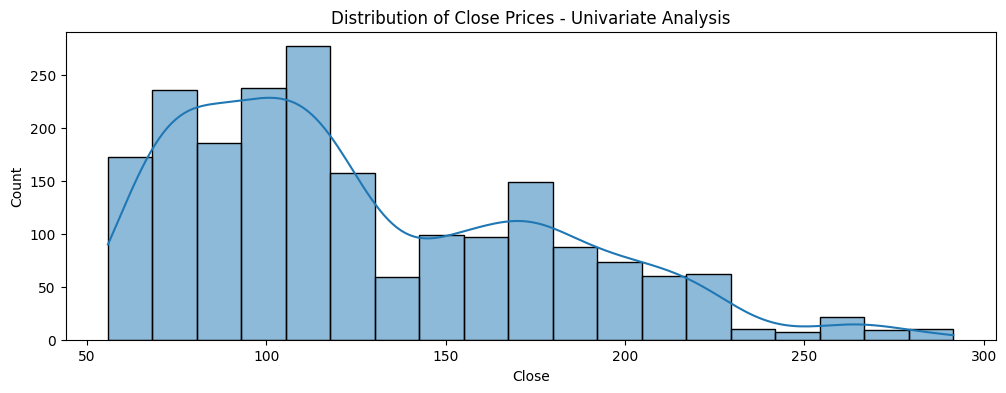

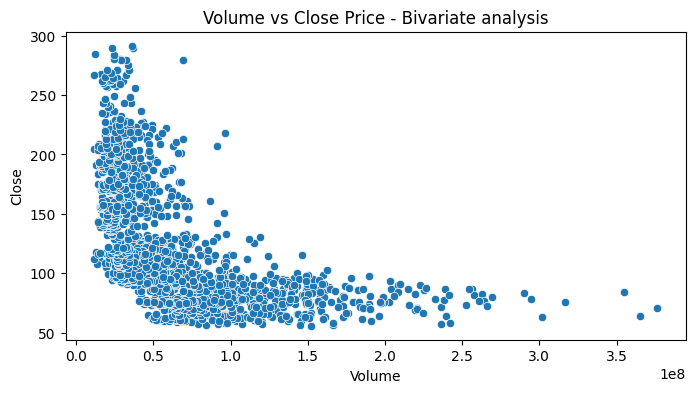

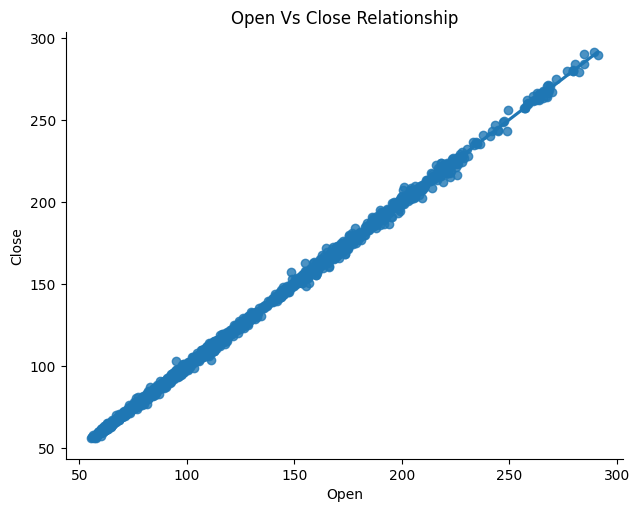

In [ ]:
print("#Exploring Data Characteristics")

import seaborn as sns
plt.figure(figsize=(12,4))
sns.histplot(df["Close"], kde=True)
plt.title("Distribution of Close Prices - Univariate Analysis")
plt.show()

plt.figure(figsize=(8,4))
sns.scatterplot(x='Volume', y='Close', data=df)
plt.title("Volume vs Close Price - Bivariate analysis")
plt.show()

#Relationship between Open and Close
sns.lmplot(x='Open', y="Close", data=df, aspect=1.3)
plt.title("Open Vs Close Relationship")
plt.show()

In [ ]:
#Performing Data Transformation
#Convert Categorical/date columns to usable form

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['weekday'] = df['Date'].dt.day_name()

#Log transformation for better distribution
df['Log_close'] = np.log1p(df['Close'])

print("After Transformation Columns:")
display(df.head())


After Transformation Columns:


,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,weekday,Log_close
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200,2012,1,3,Tuesday,4.090121
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500,2012,1,4,Wednesday,4.095392
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400,2012,1,5,Thursday,4.106250
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200,2012,1,6,Friday,4.116479
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100,2012,1,9,Monday,4.114917


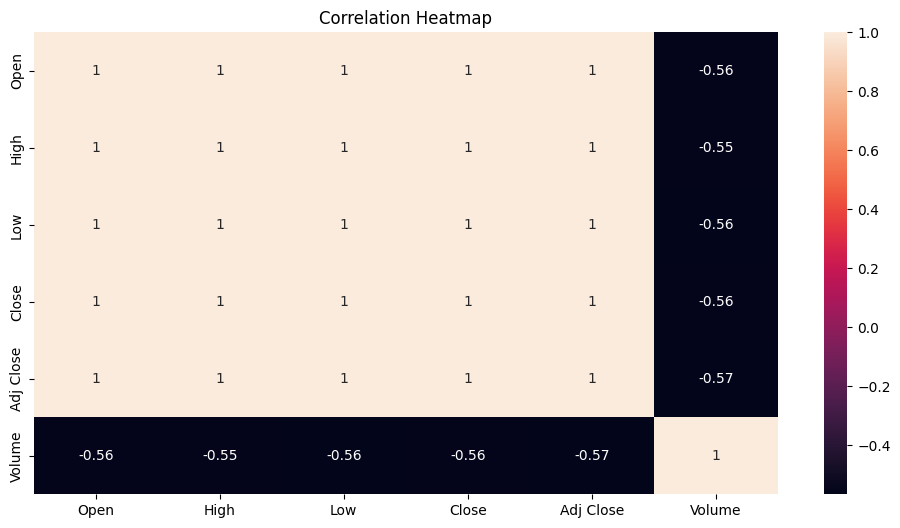

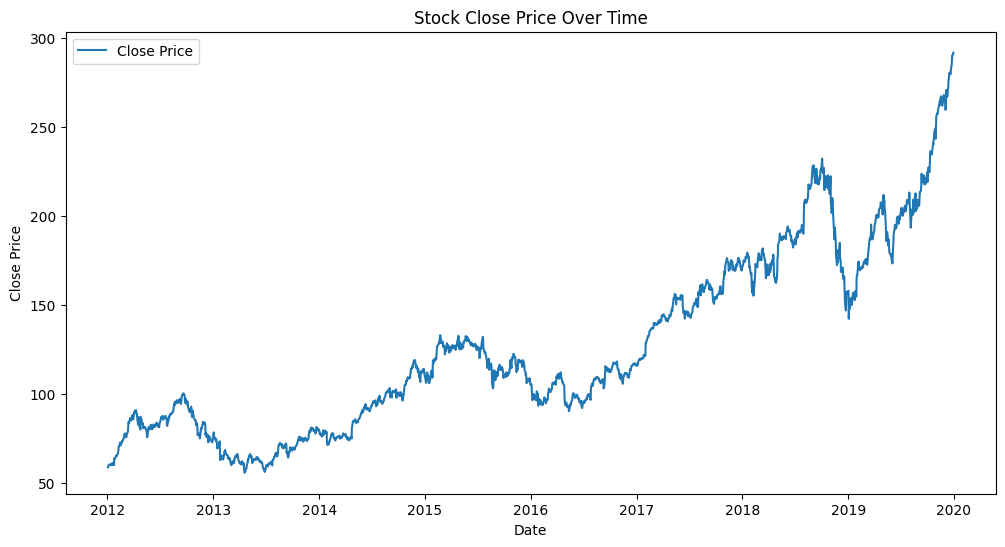

In [ ]:
#Visualizing Relationship of Data

plt.figure(figsize=(12,6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

#Time series plot
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.title("Stock Close Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

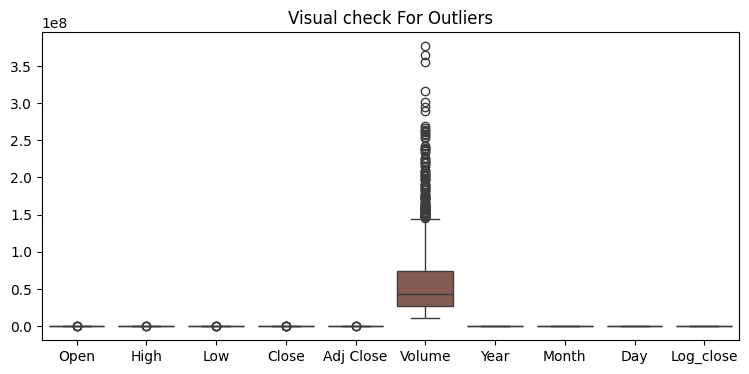

In [ ]:
plt.figure(figsize= (9,4))
sns.boxplot(df)
plt.title("Visual check For Outliers")
plt.show()

There is no Outliers in data except Volume Column which is common in Stock market.

Thats why...we are not removing it

In [ ]:
print("#Communicate Findings and Insights")
print("Close and Open price has highly correlated")
print("Volume has weaker correlation with price")
print("Some outlires is found in volume but Its common")
print("Price generally increased over time , but with volatility.")
print("Data is now ready for Feature Engineering")

#Communicate Findings and Insights
Close and Open price has highly correlated
Volume has weaker correlation with price
Some outlires is found in volume but Its common
Price generally increased over time , but with volatility.
Data is now ready for Feature Engineering


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year',
       'Month', 'Day', 'weekday', 'Log_close'],
      dtype='object')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

#Date Features
df["Year"] = df.index.year
df["Month"] = df.index.month
df["Day"] = df.index.day
df["DayOfWeek"] = df.index.dayofweek

# Lag features (previous day close)
df['Lag_1'] = df['Close'].shift(1)
df['Lag_7'] = df['Close'].shift(7)
df['Lag_7'] = df['Close'].shift(30)

# Moving Averages
df['MA_7'] = df["Close"].rolling(7).mean()
df["MA_30"] = df["Close"].rolling(30).mean()
df["MA_90"] = df["Close"].rolling(90).mean()

# Volatility (standard deviation of returns over 7 days)
df["Volatility_7"] = df["Close"].rolling(7).std()
# Volatility (standard deviation of returns over 30 days)
df['Daily_Return'] = df['Close'].pct_change()

df['Volatility_30'] = df['Daily_Return'].rolling(30).std()

#Percent Change
df["Returns"] = df["Close"].pct_change()
df["Returns_7"] = df["Close"].pct_change(7)
df["Returns_30"] = df["Close"].pct_change(30)

#High–Low Range
df["HL_Range"] = df["High"] - df["Low"]

#Open–Close Range
df["OC_Range"] = df["Open"] - df["Close"]




In [ ]:
#remove nan
df = df.dropna()

In [ ]:
#data after feature engineering
df.head()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day,weekday,...,MA_30,MA_90,Volatility_7,Daily_Return,Volatility_30,Returns,Returns_7,Returns_30,HL_Range,OC_Range
Date,,,,,,,,,,,,,,,,,,,,,
2012-05-10,82.082855,82.268570,81.205711,81.502853,70.429832,83300000,2012,5,10,Thursday,...,85.342905,76.096429,1.110633,0.002354,0.025815,0.002354,-0.019944,-0.076261,1.062859,0.580002
2012-05-11,80.714287,82.067146,80.621429,80.958572,69.959488,99886500,2012,5,11,Friday,...,85.137428,76.343222,0.776874,-0.006678,0.025757,-0.006678,-0.032885,-0.070754,1.445717,-0.244285
2012-05-14,80.367142,81.072861,79.657143,79.745712,68.911415,88156600,2012,5,14,Monday,...,84.940619,76.573032,0.596521,-0.014981,0.025721,-0.014981,-0.040562,-0.068935,1.415718,0.621430
2012-05-15,80.207146,80.459999,78.821426,79.024284,68.287987,119084000,2012,5,15,Tuesday,...,84.628904,76.787540,0.952864,-0.009047,0.024934,-0.009047,-0.021371,-0.105815,1.638573,1.182862
2012-05-16,79.150002,79.555717,77.291428,78.011429,67.412743,140224000,2012,5,16,Wednesday,...,84.232523,76.983857,1.342256,-0.012817,0.024677,-0.012817,-0.041090,-0.132270,2.264289,1.138573


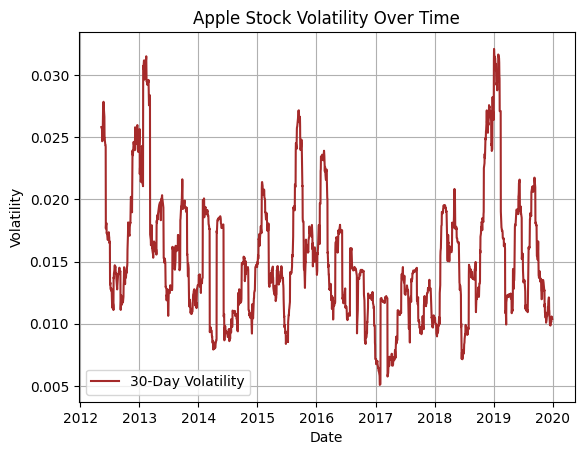

In [ ]:
# Volatility trend
plt.figure()
plt.plot(df.index, df['Volatility_30'], color='brown', label='30-Day Volatility')
plt.title("Apple Stock Volatility Over Time")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.grid(True)
plt.show()

MODEL BUILDING - ARIMA MODEL


In [ ]:
df = df.reset_index()

data = df[["Date", "Close"]].copy()
data = data.set_index("Date")

train = data.iloc[:-30]
test = data.iloc[-30:]

model = ARIMA(train["Close"], order=(5,1,0))
arima_result = model.fit()
arima_forecast = arima_result.forecast(steps=30)

mae = mean_absolute_error(test["Close"], arima_forecast)
mse = mean_squared_error(test["Close"], arima_forecast)
rmse = np.sqrt(mse)
print("ARIMA MAE:", mae)
print("ARIMA RMSE:", rmse)


ARIMA MAE: 9.857585120560172
ARIMA RMSE: 13.212568246193603


SARIMA - MODEL BUILDING

In [ ]:
sarima_model = sm.tsa.statespace.SARIMAX(train, order=(3, 1, 2), seasonal_order=(1, 1, 1, 12))
sarimax_result = sarima_model.fit()
sarimax_forecast = sarimax_result.forecast(steps=(len(test)))
print("SARIMA MSE:", mean_squared_error(test, sarimax_forecast))
print("SARIMA MAE:", mean_absolute_error(test, sarimax_forecast))

SARIMA MSE: 115.83327456018772
SARIMA MAE: 7.846482932293474


XGB - MODEL BUILDING

In [ ]:
df_model = df.select_dtypes(include=["float", "int"])

x= df_model.drop("Close", axis=1)
y = df_model["Close"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False)
xgb = XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, subsample=0.8, colsample_bytree=0.8, objective="reg:squarederror")

xgb.fit(x_train, y_train)
xgb_pred = xgb.predict(x_test)

print("XGBoost MSE:", mean_squared_error(y_test, xgb_pred))
print("XGBoost MAE:", mean_absolute_error(y_test, xgb_pred))

XGBoost MSE: 931.9472575300681
XGBoost MAE: 19.442271122438108


In [ ]:
last_row = x.iloc[-1].copy()   # Starting feature row used to begin recursive XGBoost forecasting
xgb_forecast = []              # List to store the next 30 predicted values

In [ ]:
print(len(x.columns))
print(x.columns)

23
Index(['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Year', 'Month', 'Day',
       'Log_close', 'DayOfWeek', 'Lag_1', 'Lag_7', 'MA_7', 'MA_30', 'MA_90',
       'Volatility_7', 'Daily_Return', 'Volatility_30', 'Returns', 'Returns_7',
       'Returns_30', 'HL_Range', 'OC_Range'],
      dtype='object')


In [ ]:
xgb_forecast = []

# Take last row of x
last_row = x.iloc[-1].copy()

# Reindex to ensure correct column order
last_row = last_row.reindex(x.columns, fill_value=0)

for i in range(30):

    # Predict
    pred = xgb.predict(last_row.values.reshape(1, -1))[0]
    xgb_forecast.append(pred)

    # Update features

    # Lags
    last_row["Lag_1"] = pred
    last_row["Lag_7"] = last_row["Lag_1"]

    # MA updates
    last_row["MA_7"] = (last_row["MA_7"] * 7 + pred) / 8
    last_row["MA_30"] = (last_row["MA_30"] * 30 + pred) / 31
    last_row["MA_90"] = (last_row["MA_90"] * 90 + pred) / 91

    # Daily Return
    last_row["Daily_Return"] = pred - last_row["Lag_1"]

    # Volatility_30 unchanged—rolling can't update in future steps
    last_row["Volatility_30"] = last_row["Volatility_30"]

    # Percent returns
    last_row["Returns"] = pred - last_row["Lag_1"]
    last_row["Returns_7"] = pred - last_row["Lag_7"]
    last_row["Returns_30"] = pred - last_row["Lag_1"]

    # we Keep HL_Range & OC_Range same because future High/Low/Open are unknown

# Convert to numpy list
xgb_forecast = list(xgb_forecast)


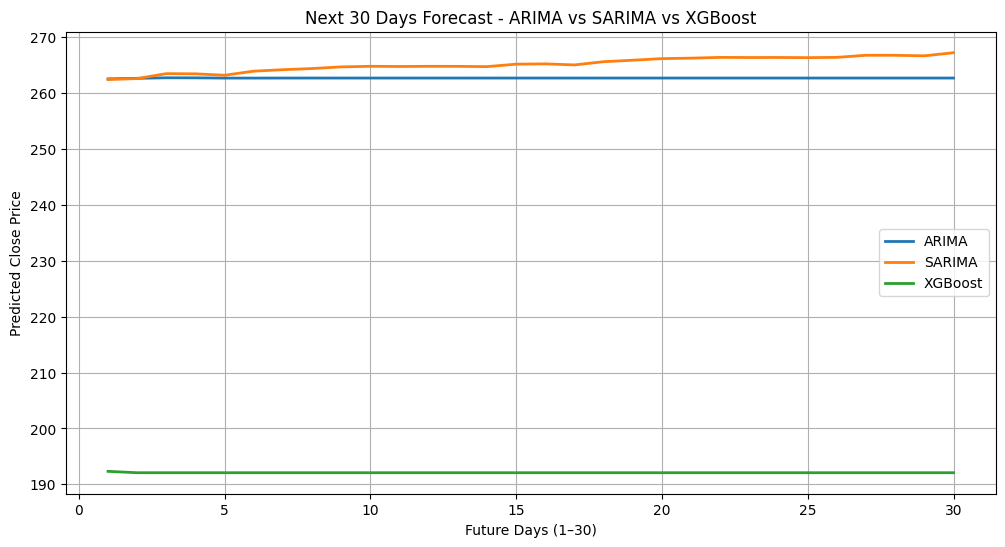

In [ ]:
future_days = range(1, 31)

plt.figure(figsize=(12,6))

plt.plot(future_days, arima_forecast, label="ARIMA", linewidth=2)
plt.plot(future_days, sarimax_forecast, label="SARIMA", linewidth=2)
plt.plot(future_days, xgb_forecast, label="XGBoost", linewidth=2)

plt.xlabel("Future Days (1–30)")
plt.ylabel("Predicted Close Price")
plt.title("Next 30 Days Forecast - ARIMA vs SARIMA vs XGBoost")
plt.legend()
plt.grid(True)
plt.show()


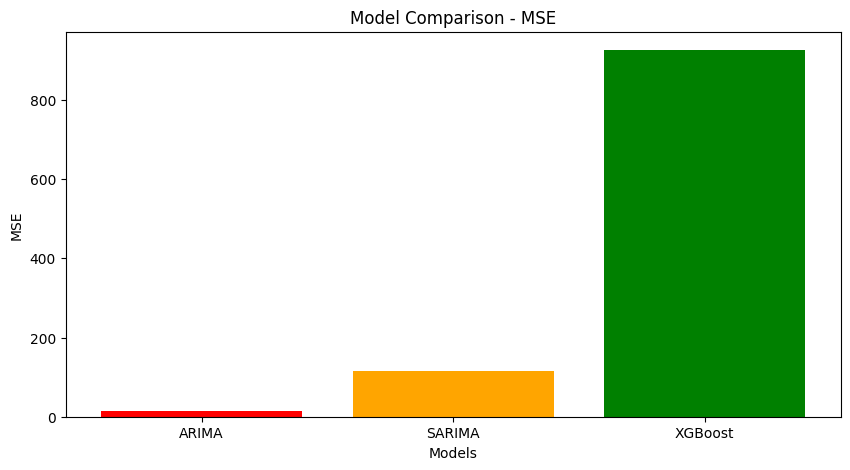

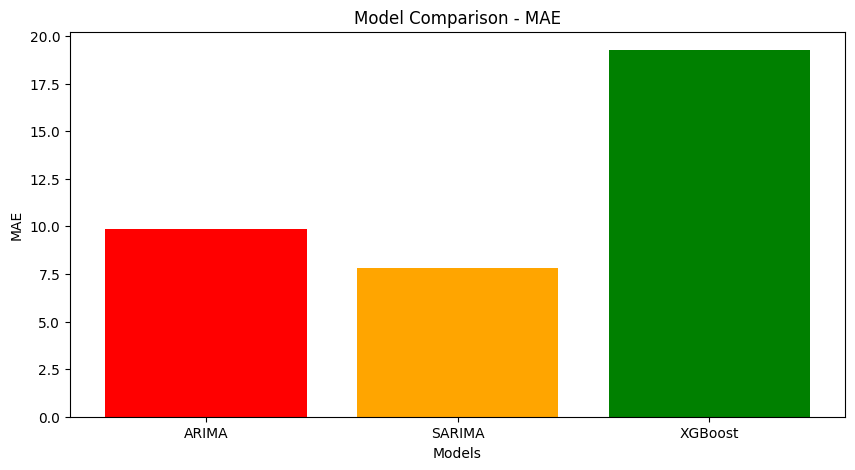

In [ ]:
import matplotlib.pyplot as plt

models = ["ARIMA", "SARIMA", "XGBoost"]
mse = [13.21, 115.56, 925.85]  # put your ARIMA MSE here
mae = [9.85, 7.83, 19.26]     # put your ARIMA MAE here

plt.figure(figsize=(10,5))
plt.bar(models, mse, color=["red","orange","green"])
plt.title("Model Comparison - MSE")
plt.xlabel("Models")
plt.ylabel("MSE")
plt.show()

plt.figure(figsize=(10,5))
plt.bar(models, mae, color=["red","orange","green"])
plt.title("Model Comparison - MAE")
plt.xlabel("Models")
plt.ylabel("MAE")
plt.show()


Based on MSE, MAE, and forecast behavior, ARIMA is the most accurate and reliable model for predicting Apple stock prices for the next 30 days.

SARIMA showed higher error and overestimated the trend, while XGBoost significantly underestimated the future prices.

Therefore, ARIMA is selected as the final model for deployment.

In [ ]:
import pickle

with open("arima_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("feature_cols.pkl", "wb") as f:
    pickle.dump(list(x.columns), f)

last_row = x.iloc[-1]
with open("last_row.pkl", "wb") as f:
    pickle.dump(last_row, f)